In [1]:
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
comp_data = pd.read_csv("../data/2609_data_w2v.csv")

In [3]:
columnas = comp_data.columns.tolist()

In [4]:
selected_columns = [col for col in comp_data.columns if col.startswith('title_emb_') and col[10:].isdigit() and 0 <= int(col[10:]) <= 299]
embedding_all = comp_data[selected_columns]

In [7]:
scaler = StandardScaler(with_std=True, with_mean=True)
embedding_all = pd.DataFrame(scaler.fit_transform(embedding_all), columns=embedding_all.columns)

In [8]:
# Realiza el análisis de componentes principales (PCA) en los datos escalados
pcaEMB = PCA()
pcaEMB.fit(embedding_all)

# Crea un DataFrame para almacenar los resultados del PCA
scores = pd.DataFrame(pcaEMB.transform(embedding_all), index=embedding_all.index)
scores.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.192239,7.624649,8.430227,-0.252695,-1.114905,0.362442,2.022702,-0.730678,-1.814945,1.659600,...,-0.195008,-0.047304,-0.042513,-0.000481,0.083834,-0.053444,-0.150634,0.168415,0.001573,-0.057035
1,8.721761,3.579136,-0.387607,2.999170,2.077320,1.360922,3.358235,-1.522378,2.404503,0.104840,...,-0.084056,-0.079838,0.103755,-0.018011,-0.138467,-0.063613,-0.067789,-0.112608,0.071768,0.118778
2,5.617738,-4.706202,0.377638,-2.022720,-1.059612,-1.183186,1.116886,0.089527,-1.608860,0.322260,...,0.097154,0.074024,-0.080478,0.000098,0.078829,-0.181775,-0.020974,-0.139615,-0.211418,0.092499
3,-1.806845,-1.333557,-3.146421,1.516101,-0.420387,7.011149,-1.711312,-5.452950,-2.195135,2.010190,...,-0.069270,0.019819,-0.108370,-0.037784,-0.104390,-0.085227,-0.012752,0.223029,0.009985,-0.019962
4,-2.371069,7.217595,5.890104,-3.060035,-0.564047,3.115760,-0.078203,-1.093621,3.582542,2.315397,...,0.160719,0.367460,-0.313875,-0.086787,0.099524,-0.045621,-0.273140,0.163031,0.031109,0.007165


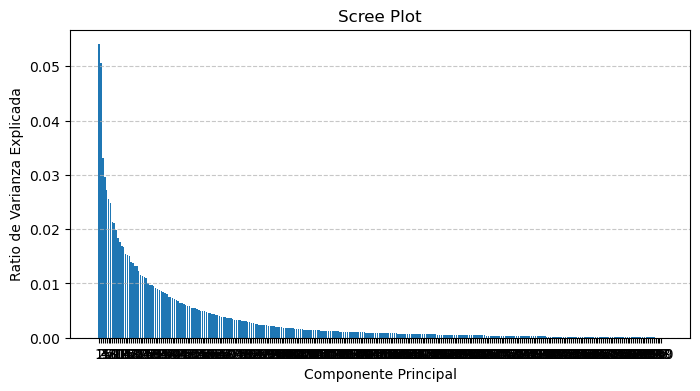

In [12]:
# Crea un gráfico de scree plot para visualizar la varianza explicada por cada componente
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pcaEMB.explained_variance_ratio_) + 1),
        pcaEMB.explained_variance_ratio_, align='center')
plt.xlabel('Componente Principal')
plt.ylabel('Ratio de Varianza Explicada')
plt.title('Scree Plot')
plt.xticks([e + 1 for e in range(len(pcaEMB.explained_variance_ratio_))])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

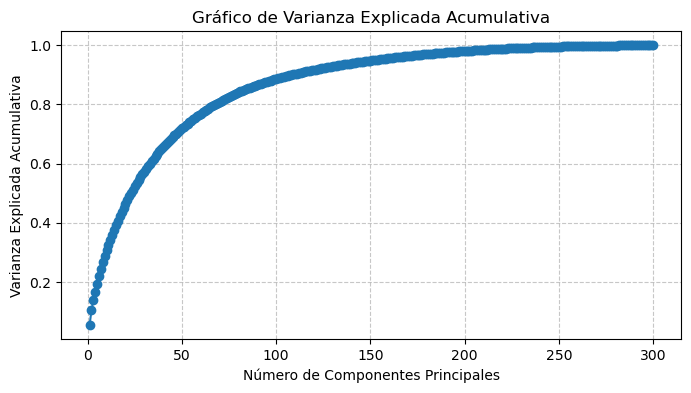

In [13]:
# Crea un gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pcaEMB.explained_variance_ratio_.cumsum()) + 1),
         pcaEMB.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Gráfico de Varianza Explicada Acumulativa')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Select the first 100 principal components
n_components = 100
pca_selected = PCA(n_components=n_components)

# Fit the PCA on your data
pca_selected.fit(embedding_all)

# Transform your data using the selected components
embedding_reduced = pca_selected.transform(embedding_all)

# Convert the transformed data back to a DataFrame if needed
embedding_reduced_df = pd.DataFrame(embedding_reduced, index=embedding_all.index)

# Rename the columns with the desired names
embedding_reduced_df.columns = [f'title_emb_{i}' for i in range(n_components)]